# MGI MinION sequence comparisons

Just a (quick?) comparison of MGI and MinION taxonomy predictions

In [102]:
import os
import sys

import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns
import json

## Read the mgi and minion _genus_ taxonomy

mgi_df = pd.read_csv("../MGI/Taxonomy/MGI_reads_genus.normalised.tsv.gz", sep='\t', compression='gzip')
mgi_df = mgi_df[mgi_df['taxonomy'].str.contains('k__Bacteria')]
mgi_df = mgi_df[~mgi_df['taxonomy'].str.endswith('s__')]
mgi_df = mgi_df[~mgi_df['taxonomy'].str.endswith('g__')]
mgi_df = mgi_df[~mgi_df['taxonomy'].str.contains('g__;')]
mgi_df = mgi_df.set_index('taxonomy')
mgi_df.index = mgi_df.index.str.split(';').str[-1]
mgi_df.head()

In [57]:
# load the data table
min_df = pd.read_csv("../MinION/Taxonomy/Minion_read_based_annotations_genus.normalised.tsv.gz", sep='\t', compression='gzip')
min_df = min_df[min_df['taxonomy'].str.contains('k__Bacteria')]
min_df = min_df[~min_df['taxonomy'].str.endswith('s__')]
min_df = min_df[~min_df['taxonomy'].str.endswith('g__')]
min_df = min_df[~min_df['taxonomy'].str.contains('g__;')]
min_df = min_df.set_index('taxonomy')
min_df.index = min_df.index.str.split(';').str[-1]
min_df.head()

,825012_20181120_S,698917_20171207_S,1586713_20180309_S,748160_20180321_S,1593973_20180504_S,1316979_20171215_S,756934_20181218_S,983493_20180123_S,892355_20180123_S,1651490_20171010_S,...,788707_20180313_S,1565754_20180403_S,639354_20171206_S,1593973_20180427_S,788707_20171213_S,1316935_20180417_S,1565754_20171128_S,785991_20180321_S,658355_20171204_S,748699_20180410_S
taxonomy,,,,,,,,,,,,,,,,,,,,,
g__Candidatus Stahlbacteria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g__Candidatus Chromulinivorax,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g__Bradymonas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g__Microvenator,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g__Candidatus Acididesulfobacter,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Align the data frames so the indexes overlap

In [58]:
aligned_mgi = mgi_df.loc[mgi_df.index.intersection(min_df.index)]
aligned_min = min_df.loc[min_df.index.intersection(mgi_df.index)]
print(f"MGI: Before alignment {mgi_df.shape} After alignment: {aligned_mgi.shape}")
print(f"MinION: Before alignment {min_df.shape} After alignment: {aligned_min.shape}")

MGI: Before alignment (3581, 127) After alignment: (1423, 127)
MinION: Before alignment (1433, 60) After alignment: (1423, 60)


In [59]:
common_taxonomies = mgi_df.index.intersection(min_df.index)

# Create subsets of the DataFrames containing only the common taxonomies
mgi_common = mgi_df.loc[common_taxonomies]
min_common = min_df.loc[common_taxonomies]

taxonomy
g__Ruania                   -0.157861
g__Streptosporangium        -0.152252
g__Pseudomonas              -0.151848
g__Thermoanaerobacter       -0.129879
g__Gilliamella              -0.124298
                               ...   
g__Croceicoccus                   NaN
g__Parasphingopyxis               NaN
g__Zwartia                        NaN
g__Paucidesulfovibrio             NaN
g__Candidatus Moanabacter         NaN
Length: 1423, dtype: float64


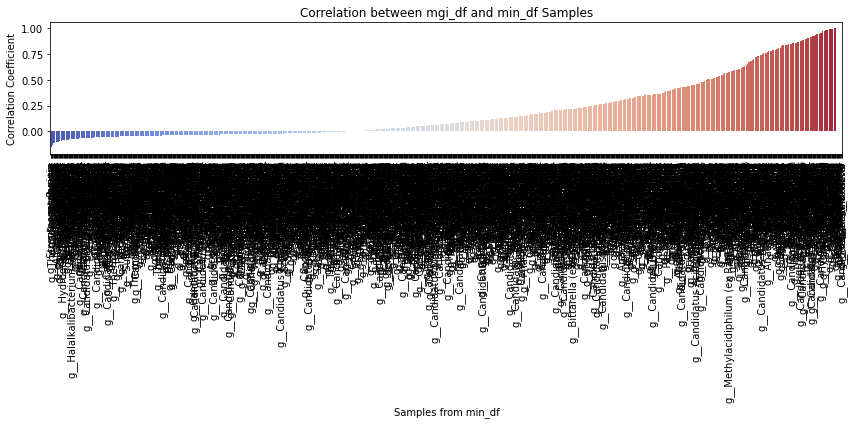

In [60]:
correlation_results = mgi_common.corrwith(min_common, axis=1)

# Display the correlation results
correlation_results = correlation_results.sort_values()
print(correlation_results)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_results.index, y=correlation_results.values, hue=correlation_results.index, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Correlation between mgi_df and min_df Samples')
plt.xlabel('Samples from min_df')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()  # Adjust layout to make room for the x-axis labels
plt.show()

In [61]:
print(f"At the genus level, the median correlation is {correlation_results.median():.3f}")

At the genus level, the median correlation is 0.070


# Different taxonomic levels

We can repeat the above with different taxonomic levels. I removed some of the redundancy and explanations here, so look above for details

At the kingdom level, the mean correlation is 0.649 and the median correlation is 0.649
At the phylum level, the mean correlation is 0.172 and the median correlation is 0.066
At the class level, the mean correlation is 0.228 and the median correlation is 0.099
At the order level, the mean correlation is 0.216 and the median correlation is 0.078
At the family level, the mean correlation is 0.175 and the median correlation is 0.048
At the genus level, the mean correlation is 0.195 and the median correlation is 0.070


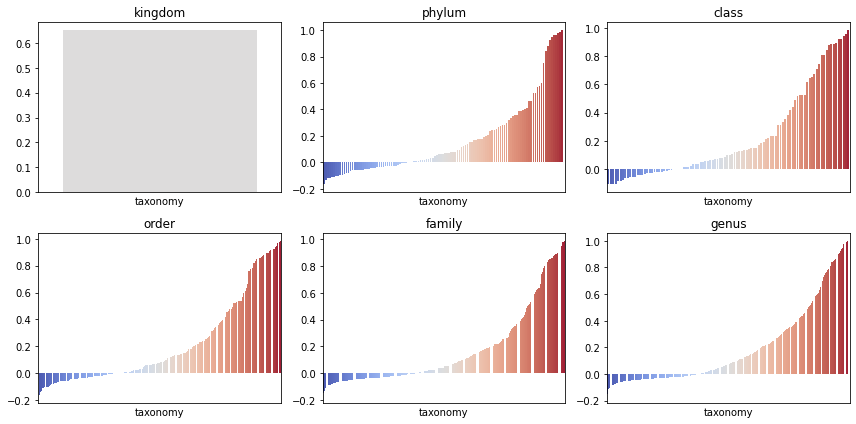

In [114]:
taxonomies = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus']


fig, ax = plt.subplots(2, 3, figsize=(12, 6))

row = 0
col = 0
for i, tax in enumerate(taxonomies):

    # read the MGI data 
    mgi_df = pd.read_csv(f"../MGI/Taxonomy/MGI_reads_{tax}.normalised.tsv.gz", sep='\t', compression='gzip')
    mgi_df = mgi_df[mgi_df['taxonomy'].str.contains('k__Bacteria')]
    mgi_df = mgi_df[~mgi_df['taxonomy'].str.endswith(f'{tax[0]}__')]
    mgi_df = mgi_df.set_index('taxonomy')
    mgi_df.index = mgi_df.index.str.split(';').str[-1]

    # load the data table
    min_df = pd.read_csv(f"../MinION/Taxonomy/Minion_read_based_annotations_{tax}.normalised.tsv.gz", sep='\t', compression='gzip')
    min_df = min_df[min_df['taxonomy'].str.contains('k__Bacteria')]
    min_df = min_df[~min_df['taxonomy'].str.endswith(f'{tax[0]}__')]
    min_df = min_df.set_index('taxonomy')
    min_df.index = min_df.index.str.split(';').str[-1]

    common_taxonomies = mgi_df.index.intersection(min_df.index)

    # Create subsets of the DataFrames containing only the common taxonomies
    mgi_common = mgi_df.loc[common_taxonomies]
    min_common = min_df.loc[common_taxonomies]

    correlation_results = mgi_common.corrwith(min_common, axis=1)

    # Display the correlation results
    correlation_results = correlation_results.sort_values()

    # Plot the results

    sns.barplot(x=correlation_results.index, y=correlation_results.values, hue=correlation_results.index, palette='coolwarm', ax=ax[row][col])
    ax[row][col].title.set_text(tax)
    ax[row][col].set_xticks([])
    print(f"At the {tax} level, the mean correlation is {correlation_results.mean():.3f} and the median correlation is {correlation_results.median():.3f}")
    if i == 2:
        row = 1
        col = 0
    else:
        col += 1
        
#plt.xticks(None)
#plt.title('Correlation between mgi_df and min_df Samples')
#plt.xlabel('Samples from min_df')
#plt.ylabel('Correlation Coefficient')
plt.tight_layout()  # Adjust layout to make room for the x-axis labels
plt.show()

## Visualising Presence/Absence

Direct correlation - especially of normalised data - may not be the best way to address this. We really care whether something is seen in both data frames, so lets take a look at the presence/absence matrix

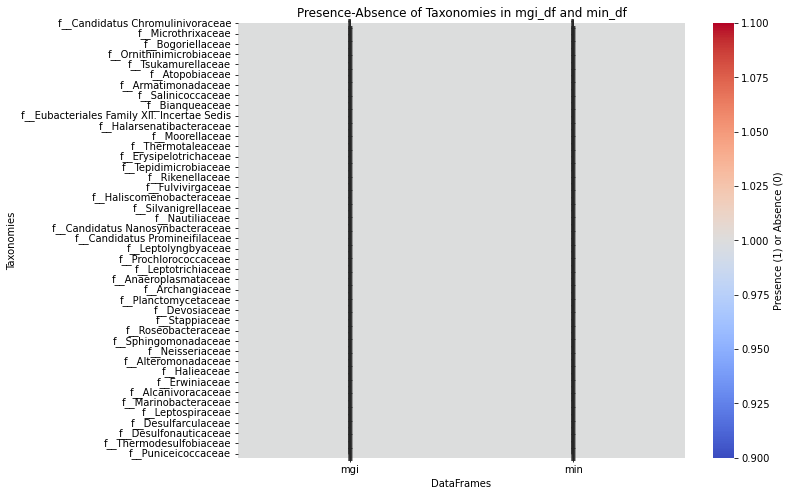

In [73]:
# Convert both DataFrames to binary presence-absence (1 if any value, 0 otherwise)
mgi_presence = (mgi_df > 0).astype(int)
min_presence = (min_df > 0).astype(int)

both = mgi_presence.add(min_presence, fill_value=0)

# Find common taxonomies
all_taxonomies = mgi_df.index.union(min_df.index)

# Create a presence-absence DataFrame for the common taxonomies
all_presence = pd.DataFrame(index=all_taxonomies)

# Add presence data from mgi_df
all_presence['mgi'] = mgi_df.loc[all_taxonomies].max(axis=1)

# Add presence data from min_df
combined_presence['min'] = min_presence.loc[common_taxonomies].max(axis=1)

# Visualize using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(combined_presence, cmap='coolwarm', annot=True, cbar_kws={'label': 'Presence (1) or Absence (0)'})
plt.title('Presence-Absence of Taxonomies in mgi_df and min_df')
plt.ylabel('Taxonomies')
plt.xlabel('DataFrames')
plt.show()

In [74]:
mgi_presence

,768745_20190228_BAL,698917_20180329_S,788707_20171213_S,698917_20171207_S,896213_20180427_S,825012_20181113_S,777599_20180306_S,877469_20190115_S,825012_20171129_S,1162967_20180116_S,...,752797_20170918_S,748699_20190114_S,676138_20171001_S,1465461_20180406_S,753522_20180606_S,1112926_20171212_S,788707_20180313_S,720054_20171120_S,701099_20180517_S,1593973_20180504_S
taxonomy,,,,,,,,,,,,,,,,,,,,,
f__Candidatus Babeliaceae,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
f__Candidatus Chromulinivoraceae,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
f__Candidatus Ozemobacteraceae,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
f__Dissulfurirhabdaceae,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
f__Bradymonadaceae,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f__Akkermansiaceae,0,0,1,1,0,1,1,0,1,0,...,1,1,1,1,1,1,1,1,1,1
f__Rubritaleaceae,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
f__Verrucomicrobia subdivision 6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


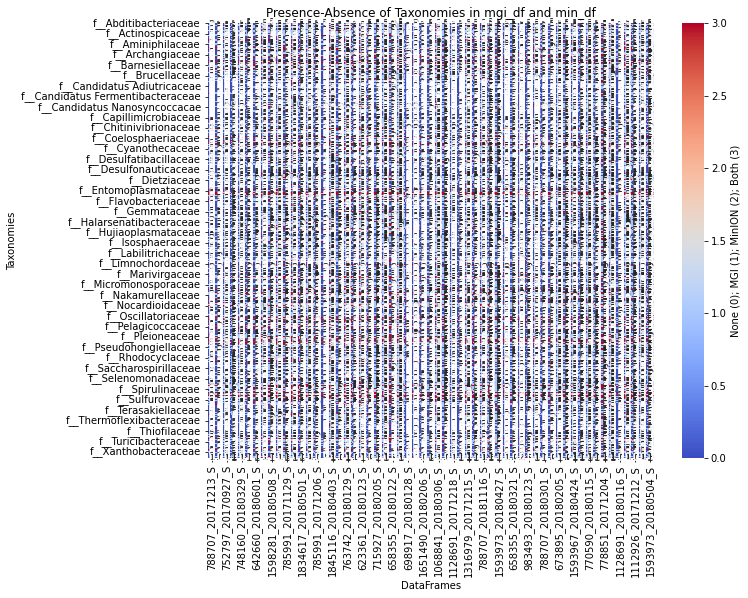

In [79]:
common_columns = mgi_df.columns.intersection(min_df.columns)
min_both = min_df[common_columns]
mgi_both = mgi_df[common_columns]

mgi_presence = (mgi_both > 0).astype(int)
min_presence = (min_both > 0).astype(int)*2

both = mgi_presence.add(min_presence, fill_value=0)



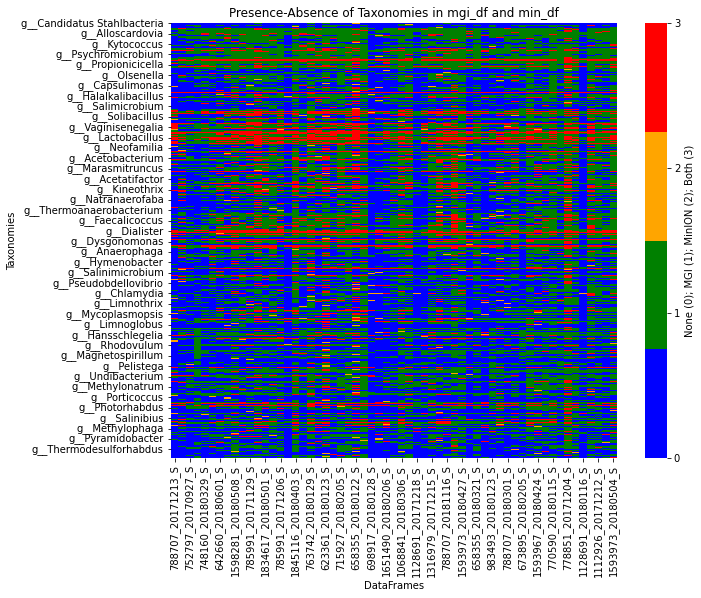

In [119]:
# Visualize using a heatmap
plt.figure(figsize=(10, 8))
cmap = ListedColormap(['blue', 'green', 'orange', 'red'])
sns.heatmap(both, cmap=cmap, vmin=0, vmax=3, annot=False, cbar_kws={'ticks': [0,1,2,3], 'label': 'None (0); MGI (1); MinION (2); Both (3)'})
plt.title('Presence-Absence of Taxonomies in mgi_df and min_df')
plt.ylabel('Taxonomies')
plt.xlabel('DataFrames')
plt.show()

## Plot heat maps for all taxonomies

We do a bunch of additional stuff, including sorting by the row sums, and setting titles, etc

First, we predefine some functions to get the taxonomy data to reduce the amount of copying/pasting. We also include a method to create a presence/absence matrix and
sort the numbers by the row sums.

In [416]:
def read_taxonomy(tax_file, firstchar, minreads = 0):
    """
    Read the taxonomy file and return a data frame
    """
    
    df = pd.read_csv(tax_file, sep='\t', compression='gzip')
    df = df[df['taxonomy'].str.contains('k__Bacteria')]
    df = df[~df['taxonomy'].str.endswith(f'{firstchar}__')]
    df = df.set_index('taxonomy')
    df.index = df.index.str.split(';').str[-1]
    if minreads: 
        df = df[~(df.lt(minreads).all(axis=1))]
    # here we average all the samples that have the same name. We may see this, eg. in Genus where we have different Streptococcuses in different samples
    df = df.groupby(df.index).mean()
    df = df.sort_index(axis=1)
    
    return df

def sorted_presence_absence(df1, df2, minrowsum=0, asc_sort=False):
    """
    Join the two tables and return the sorted version
    """
    # filter so we only include samples sequenced on both MGI and MinION
    common_columns = df1.columns.intersection(df2.columns)
    df1_both = df1[common_columns]
    df2_both = df2[common_columns]
    
    # create a presence/absence matrix
    df1_presence = (df1_both > 0).astype(int)
    df2_presence = (df2_both > 0).astype(int)*2

    # here we filter on the minimum number of columns each taxa is in if requested
    if minrowsum > 0:
        df1_presence = df1_presence.loc[df1_presence[df1_presence.sum(axis=1) > minrowsum].index]
        df2_presence = df2_presence.loc[df2_presence[df2_presence.sum(axis=1) > (2 * minrowsum)].index]
    
    # combine the two matrices and sort them
    both = df1_presence.add(df2_presence, fill_value=0)
    sboth = both.loc[both.sum(axis=1).sort_values(ascending=asc_sort).index]
    sboth = sboth.sort_index(axis=1) # sort by column names

    return sboth

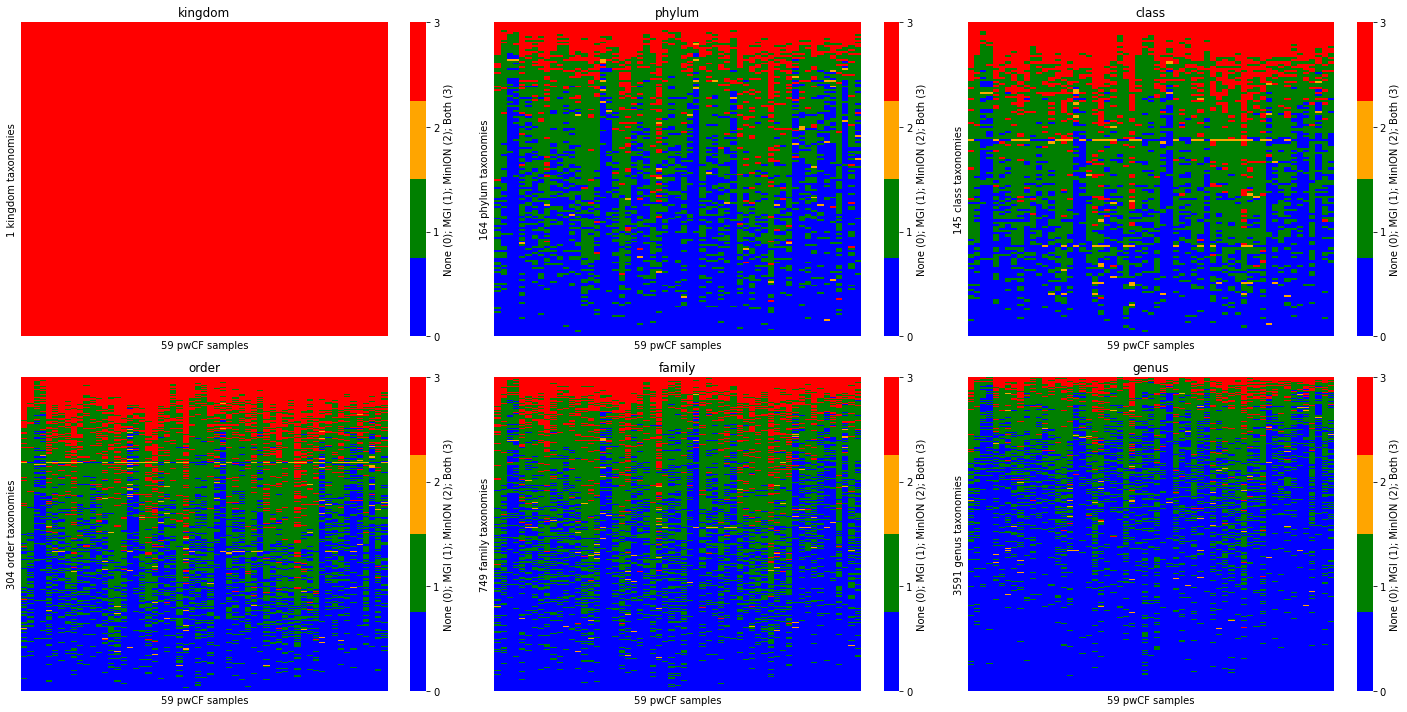

In [417]:
taxonomies = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus']

cmap = ListedColormap(['blue', 'green', 'orange', 'red'])

fig, ax = plt.subplots(2, 3, figsize=(20, 10))

row = 0
col = 0
for i, tax in enumerate(taxonomies):
    # read the data 
    mgi_df = read_taxonomy(f"../MGI/Taxonomy/MGI_reads_{tax}.normalised.tsv.gz", tax[0])
    min_df = read_taxonomy(f"../MinION/Taxonomy/Minion_read_based_annotations_{tax}.normalised.tsv.gz", tax[0])
    sboth = sorted_presence_absence(mgi_df, min_df, 0)

    g = sns.heatmap(sboth, cmap=cmap, vmin=0, vmax=3, annot=False, cbar_kws={'ticks': [0,1,2,3], 'label': 'None (0); MGI (1); MinION (2); Both (3)'}, ax=ax[row][col])

    g.title.set_text(tax)
    g.set_xticks([])
    g.set_yticks([])
    g.set_xlabel(f"{sboth.shape[1]} pwCF samples")
    g.set_ylabel(f"{sboth.shape[0]} {tax} taxonomies")
    if i == 2:
        row = 1
        col = 0
    else:
        col += 1
        
plt.tight_layout()  # Adjust layout to make room for the x-axis labels
plt.show()

## Filtering for _just_ the MinION sequences _and_ things in more than one sample

Setting the minrowsum limits the minimum number of samples each taxa can be in. We have 59 MGI and MinION samples, so setting that to 40 means ~2/3 of the samples.

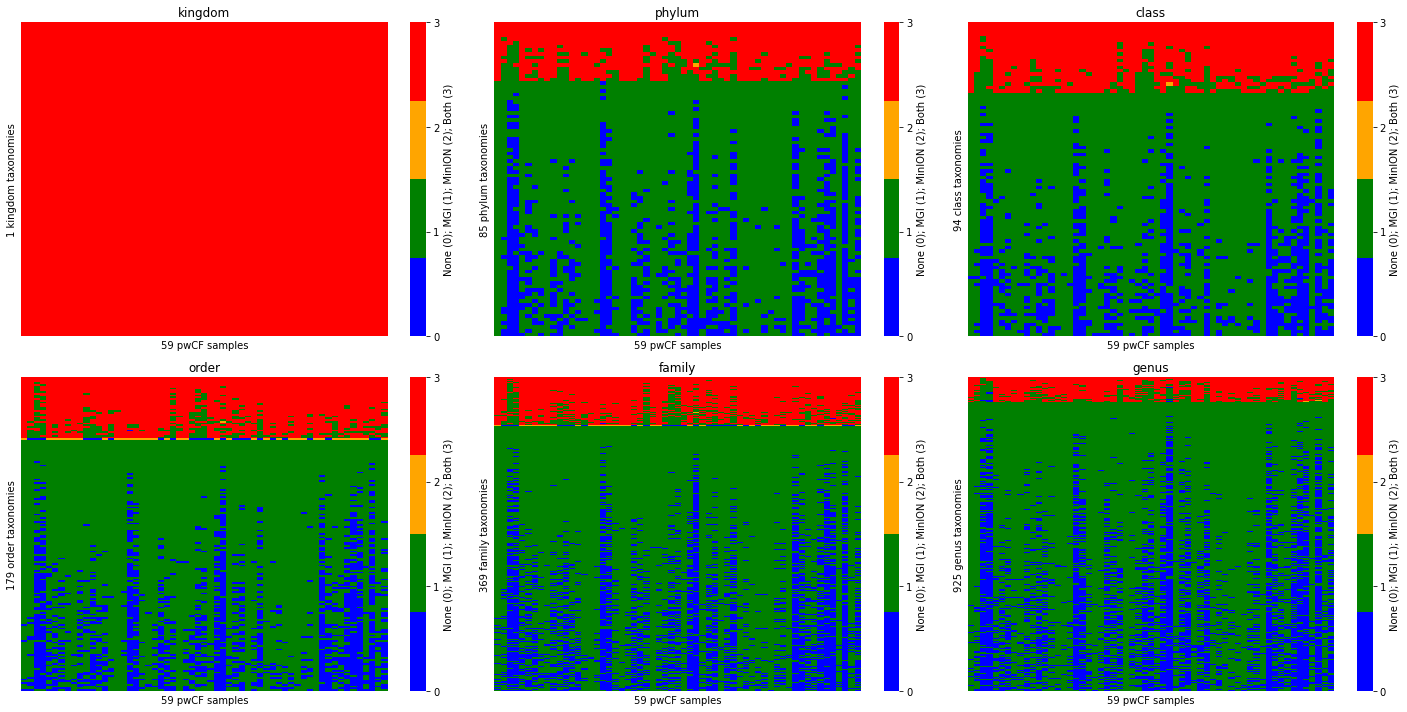

In [305]:
taxonomies = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus']

cmap = ListedColormap(['blue', 'green', 'orange', 'red'])

fig, ax = plt.subplots(2, 3, figsize=(20, 10))

row = 0
col = 0
for i, tax in enumerate(taxonomies):
    # read the data 
    mgi_df = read_taxonomy(f"../MGI/Taxonomy/MGI_reads_{tax}.normalised.tsv.gz", tax[0])
    min_df = read_taxonomy(f"../MinION/Taxonomy/Minion_read_based_annotations_{tax}.normalised.tsv.gz", tax[0])
    sboth = sorted_presence_absence(mgi_df, min_df, 30)

    g = sns.heatmap(sboth, cmap=cmap, vmin=0, vmax=3, annot=False, cbar_kws={'ticks': [0, 1, 2, 3], 'label': 'None (0); MGI (1); MinION (2); Both (3)'}, ax=ax[row][col])

    g.title.set_text(tax)
    g.set_xticks([])
    g.set_yticks([])
    g.set_xlabel(f"{sboth.shape[1]} pwCF samples")
    g.set_ylabel(f"{sboth.shape[0]} {tax} taxonomies")
    if i == 2:
        row = 1
        col = 0
    else:
        col += 1
    
plt.tight_layout()  # Adjust layout to make room for the x-axis labels
plt.show()

## 3-D heatmap

Attempt to make a 3-D heatmap using the family data.

In [306]:
def convert_df_xyz(mgi_df, sboth):
    """
    Convert the data frame into xyz values. X and Y come from `sboth` (sorted both MGI & Minion) and Z comes from MGI coverage.
    """
   
    # we need to get the MGI data in the same order as the sboth dataframe
    mgi_reorg = mgi_df.reindex(index=sboth.index, columns=sboth.columns)

    # Prepare data for 3D plot
    x = np.arange(sboth.shape[1])  # x coordinates (samples)
    y = np.arange(sboth.shape[0])  # y coordinates (taxa)
    x, y = np.meshgrid(x, y)  # Create a meshgrid for x and y
    z = mgi_reorg.values  # Height values

    return (x, y, z)

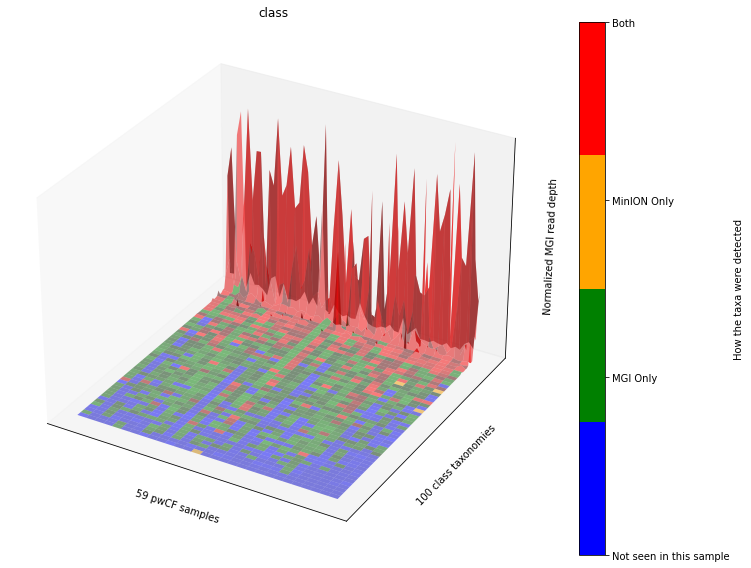

In [418]:
tax='class'
# read the data 
mgi_df = read_taxonomy(f"../MGI/Taxonomy/MGI_reads_{tax}.normalised.tsv.gz", tax[0])
min_df = read_taxonomy(f"../MinION/Taxonomy/Minion_read_based_annotations_{tax}.normalised.tsv.gz", tax[0])
common_taxonomies = mgi_df.index.intersection(min_df.index)

# Create subsets of the DataFrames containing only the common taxonomies
mgi_df_l = mgi_df.loc[common_taxonomies]
min_df_l = min_df.loc[common_taxonomies]

sboth = sorted_presence_absence(mgi_df_l, min_df_l, 0, asc_sort=True)
x, y, z = convert_df_xyz(mgi_df_l, sboth)

# Define a color map based on the heatmap values
cmap = ListedColormap(['blue', 'green', 'orange', 'red'])
colors = cmap(sboth.values / sboth.values.max())

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.plot_surface(x,y,z, facecolors=colors, edgecolor='None', alpha=0.5, vmin=0, vmax=3, antialiased=True)

# Set labels
ax.title.set_text(tax)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlabel(f"{sboth.shape[1]} pwCF samples")
ax.set_ylabel(f"{sboth.shape[0]} {tax} taxonomies")
ax.set_zlabel("Normalized MGI read depth")

# Show color bar
mappable = plt.cm.ScalarMappable(cmap=cmap)
mappable.set_array(np.linspace(0, 3, 256))  # Color bar mapping
cbar = plt.colorbar(mappable, ax=ax)
cbar.set_label('How the taxa were detected')
cbar.set_ticks([0, 1, 2, 3])
cbar.ax.set_yticklabels(["Not seen in this sample", "MGI Only", 'MinION Only', 'Both'])

plt.tight_layout()  # Adjust layout to make room for the x-axis labels
plt.show()

# Plot all the taxonomies on a single image

It ends up, I don't like this and the next box is better!

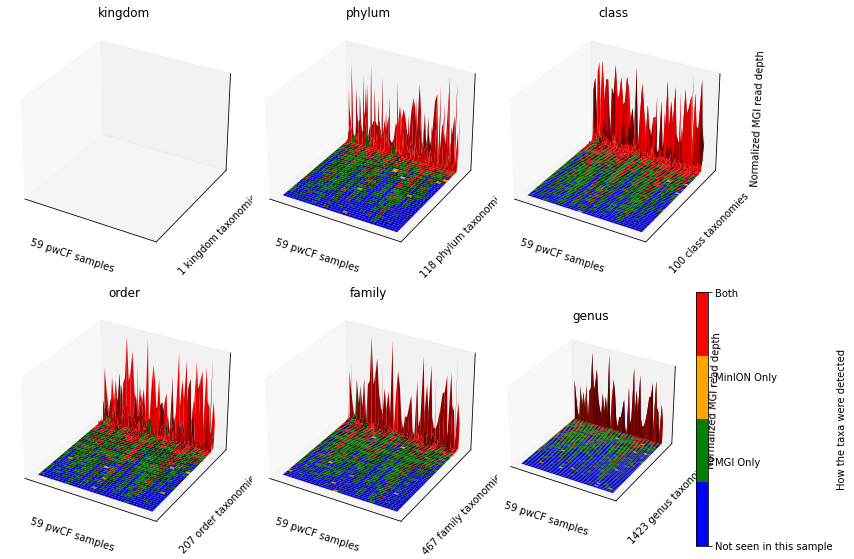

In [419]:
taxonomies = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus']

cmap = ListedColormap(['blue', 'green', 'orange', 'red'])

fig = plt.figure(figsize=(12, 8))
#fig, ax = plt.subplots(2, 3, figsize=(20, 10))

row = 0
col = 0
for i, tax in enumerate(taxonomies):
    # read the data 
    mgi_df = read_taxonomy(f"../MGI/Taxonomy/MGI_reads_{tax}.normalised.tsv.gz", tax[0])
    min_df = read_taxonomy(f"../MinION/Taxonomy/Minion_read_based_annotations_{tax}.normalised.tsv.gz", tax[0])
    common_taxonomies = mgi_df.index.intersection(min_df.index)

    # Create subsets of the DataFrames containing only the common taxonomies
    mgi_df_l = mgi_df.loc[common_taxonomies]
    min_df_l = min_df.loc[common_taxonomies]

    sboth = sorted_presence_absence(mgi_df_l, min_df_l, 0, asc_sort=True)
    x, y, z = convert_df_xyz(mgi_df_l, sboth)


    # Define a color map based on the heatmap values
    colors = cmap(sboth.values / sboth.values.max())

    # Create a 3D plot
    ax = fig.add_subplot(2,3,i+1, projection='3d')
    sc = ax.plot_surface(x,y,z, facecolors=colors, edgecolor='None', vmin=0, vmax=3, antialiased=True)
    
    # Set labels
    ax.title.set_text(tax)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_xlabel(f"{sboth.shape[1]} pwCF samples")
    ax.set_ylabel(f"{sboth.shape[0]} {tax} taxonomies")
    ax.set_zlabel("Normalized MGI read depth")

    if i == 2:
        row = 1
        col = 0
    else:
        col += 1
        
        

# Show color bar
mappable = plt.cm.ScalarMappable(cmap=cmap)
mappable.set_array(np.linspace(0, 3, 256))  # Color bar mapping
cbar = plt.colorbar(mappable, ax=ax)
cbar.set_label('How the taxa were detected')
cbar.set_ticks([0, 1, 2, 3])
cbar.ax.set_yticklabels(["Not seen in this sample", "MGI Only", 'MinION Only', 'Both'])
plt.tight_layout()  # Adjust layout to make room for the x-axis labels
plt.show()

# Plot all the taxonomies on separate images

This code makes separate `.png` and `.svg` images for each plot. I like this better as we can composit them into a single image later

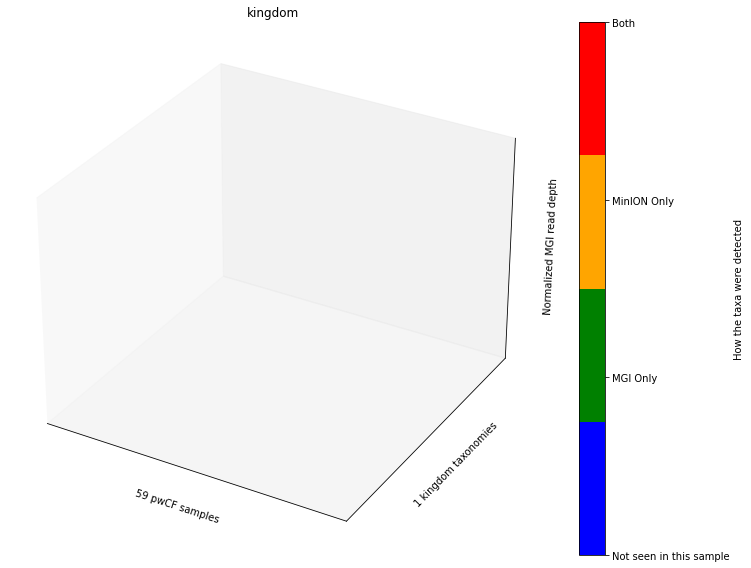

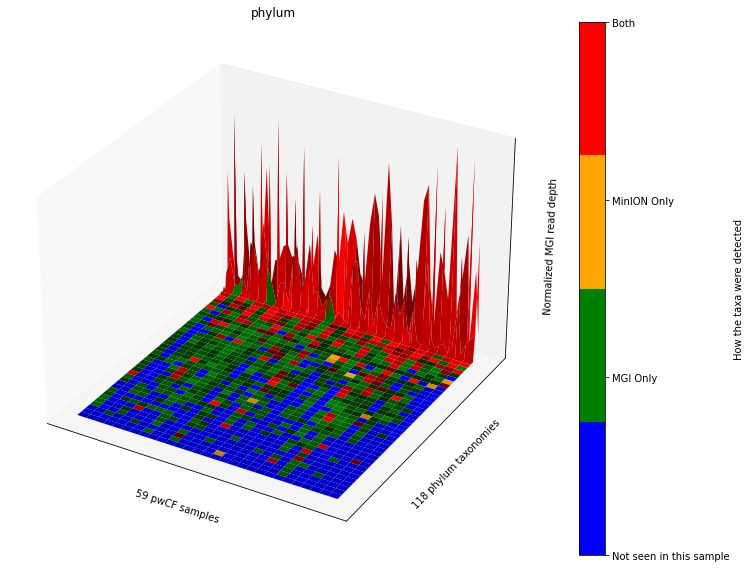

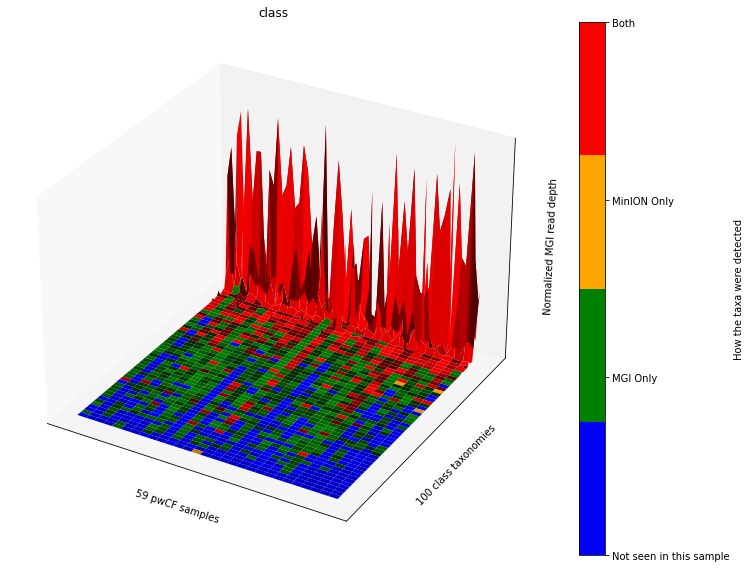

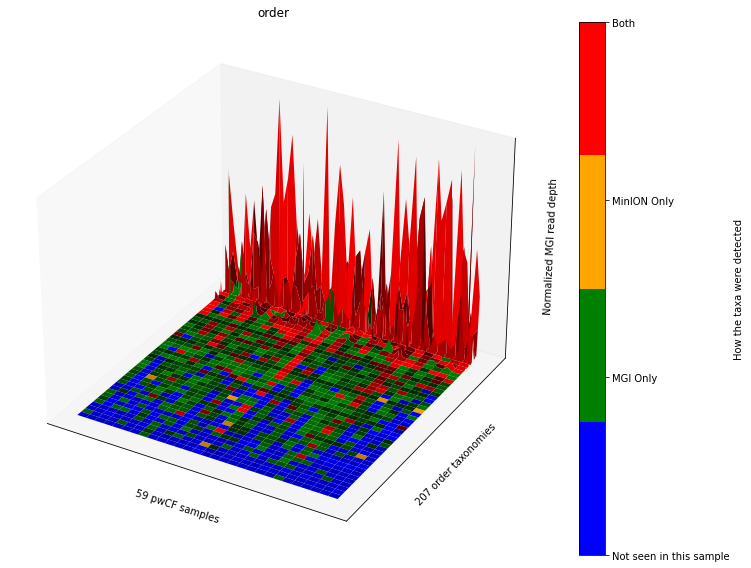

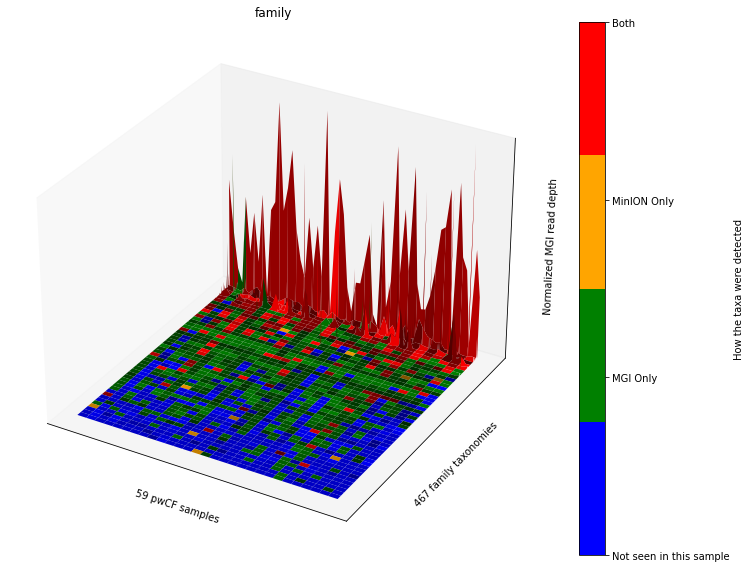

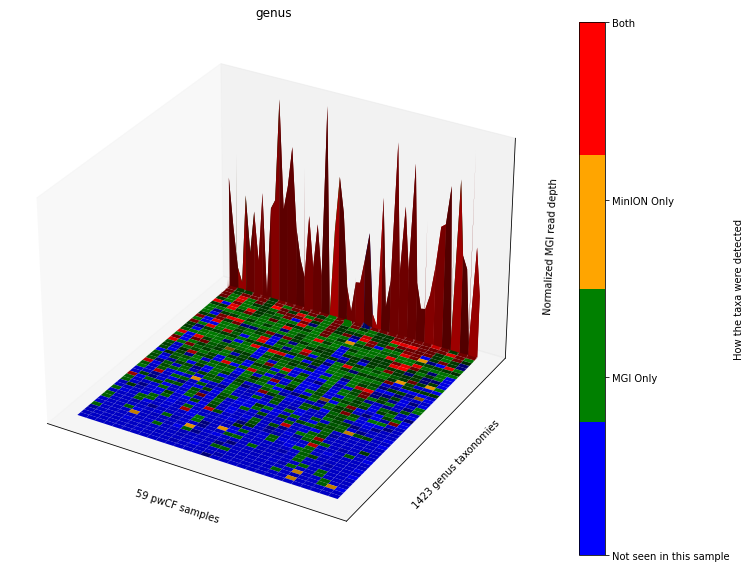

In [420]:
taxonomies = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus']

cmap = ListedColormap(['blue', 'green', 'orange', 'red'])

row = 0
col = 0
for i, tax in enumerate(taxonomies):
    # read the data 
    mgi_df = read_taxonomy(f"../MGI/Taxonomy/MGI_reads_{tax}.normalised.tsv.gz", tax[0])
    min_df = read_taxonomy(f"../MinION/Taxonomy/Minion_read_based_annotations_{tax}.normalised.tsv.gz", tax[0])
    common_taxonomies = mgi_df.index.intersection(min_df.index)

    # Create subsets of the DataFrames containing only the common taxonomies
    mgi_df_l = mgi_df.loc[common_taxonomies]
    min_df_l = min_df.loc[common_taxonomies]

    sboth = sorted_presence_absence(mgi_df_l, min_df_l, 0, asc_sort=True)
    x, y, z = convert_df_xyz(mgi_df_l, sboth)


    # Define a color map based on the heatmap values
    colors = cmap(sboth.values / sboth.values.max())

    # Create a 3D plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.plot_surface(x,y,z, facecolors=colors, edgecolor='None', vmin=0, vmax=3, antialiased=True)
    

    # Set labels
    ax.title.set_text(tax)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_xlabel(f"{sboth.shape[1]} pwCF samples")
    ax.set_ylabel(f"{sboth.shape[0]} {tax} taxonomies")
    ax.set_zlabel("Normalized MGI read depth")

    if i == 2:
        row = 1
        col = 0
    else:
        col += 1
        
        

    # Show color bar
    mappable = plt.cm.ScalarMappable(cmap=cmap)
    mappable.set_array(np.linspace(0, 3, 256))  # Color bar mapping
    cbar = plt.colorbar(mappable, ax=ax)
    cbar.set_label('How the taxa were detected')
    cbar.set_ticks([0, 1, 2, 3])
    cbar.ax.set_yticklabels(["Not seen in this sample", "MGI Only", 'MinION Only', 'Both'])
    plt.tight_layout()  # Adjust layout to make room for the x-axis labels
    fig.savefig(f"img/3D-{tax}.svg")
    fig.savefig(f"img/3D-{tax}.png")
    plt.show()

# Limiting the data

We have a loooong tail on our MGI coverage, but I'm not sure how long. Lets take a look and see if we can come up with a sensible cutoff (e.g. 1% or 10%?)

In [421]:
tax='genus'
# read the data 
mgi_df = read_taxonomy(f"../MGI/Taxonomy/MGI_reads_{tax}.normalised.tsv.gz", tax[0])
min_df = read_taxonomy(f"../MinION/Taxonomy/Minion_read_based_annotations_{tax}.normalised.tsv.gz", tax[0])

common_columns = min_df.columns.intersection(mgi_df.columns)
mgi_df = mgi_df[common_columns]
min_df = min_df[common_columns]

mgi_max = mgi_df.max().max()
mgi_max_sample = mgi_df.max().idxmax()
mgi_max_sp = mgi_df[mgi_df[mgi_df.max().idxmax()] == mgi_df.max().max()].index[0]

min_max = min_df.max().max()
min_max_sample = min_df.max().idxmax()
min_max_sp = min_df[min_df[min_df.max().idxmax()] == min_df.max().max()].index[0]

mgi_min_max_val = mgi_df.loc[min_max_sp, min_max_sample].max()
min_mgi_max_val = min_df.loc[mgi_max_sp, mgi_max_sample].max()

print(f"""
For the MGI sequencing, the most abundant genus was _{mgi_max_sp}_, with a normalised abundance \
of {mgi_max:,.2f} RPMM in the sample {mgi_max_sample}, while for the MinION sequencing the most \
abundant genus is also _{min_max_sp}_, with a normalised abundance of {min_max:,.2f} RPMM \
in sample {min_max_sample}.

The abundance of _{mgi_max_sp}_ in the MinION data from sample {mgi_max_sample} is {min_mgi_max_val:,.2f}.
The abundance of _{min_max_sp}_ in the MGI data from sample {min_max_sample} is {mgi_min_max_val:,.2f}.
""")




For the MGI sequencing, the most abundant genus was _g__Streptococcus_, with a normalised abundance of 610,293.52 RPMM in the sample 642660_20180601_S, while for the MinION sequencing the most abundant genus is also _g__Streptococcus_, with a normalised abundance of 680,910.15 RPMM in sample 1586713_20180309_S.

The abundance of _g__Streptococcus_ in the MinION data from sample 642660_20180601_S is 584,032.58.
The abundance of _g__Streptococcus_ in the MGI data from sample 1586713_20180309_S is 594,382.79.



Shape now: (3581, 127)
Shape now: (3164, 127)


<Axes: xlabel='877469_20190115_S', ylabel='Count'>

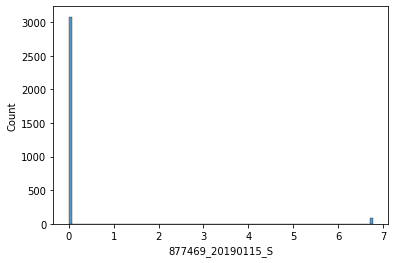

In [372]:
tax='genus'
# read the data 
mgi_df = read_taxonomy(f"../MGI/Taxonomy/MGI_reads_{tax}.normalised.tsv.gz", tax[0])
min_df = read_taxonomy(f"../MinION/Taxonomy/Minion_read_based_annotations_{tax}.normalised.tsv.gz", tax[0])



print(f"Shape now: {mgi_df.shape}")
maxcol = mgi_df.max().idxmax()
mgi_df = mgi_df[mgi_df[maxcol] < 10]
print(f"Shape now: {mgi_df.shape}")
sns.histplot(mgi_df[maxcol], bins=100)

# note that a normalised value of 10 means 100 reads per million reads mapped

The largest value is 680,910.15 in 1586713_20180309_S
The taxonomy is Index(['g__Streptococcus'], dtype='object', name='taxonomy')
Shape now: (1433, 60)
Shape now: (1413, 60)


<Axes: xlabel='1586713_20180309_S', ylabel='Count'>

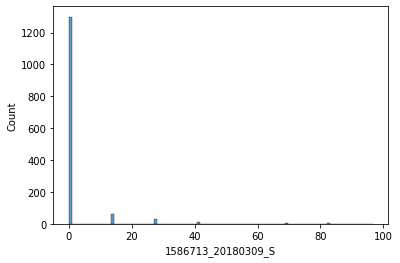

In [370]:
tax='genus'
# read the data 
mgi_df = read_taxonomy(f"../MGI/Taxonomy/MGI_reads_{tax}.normalised.tsv.gz", tax[0])
min_df = read_taxonomy(f"../MinION/Taxonomy/Minion_read_based_annotations_{tax}.normalised.tsv.gz", tax[0])
print(f"The largest value is {min_df.max().max():,.2f} in {min_df.max().idxmax()}")

tophit = min_df[mgi_df[min_df.max().idxmax()] == min_df.max().max()]
print(f"The taxonomy is {tophit.index}")


print(f"Shape now: {min_df.shape}")
maxcol = min_df.max().idxmax()
min_df = min_df[min_df[maxcol] < 100]
print(f"Shape now: {min_df.shape}")
sns.histplot(min_df[maxcol], bins=100)

# note that a normalised value of 10 means 100 reads per million reads mapped

## Limiting the visualisation to those samples with at least 100 reads per million mapped reads

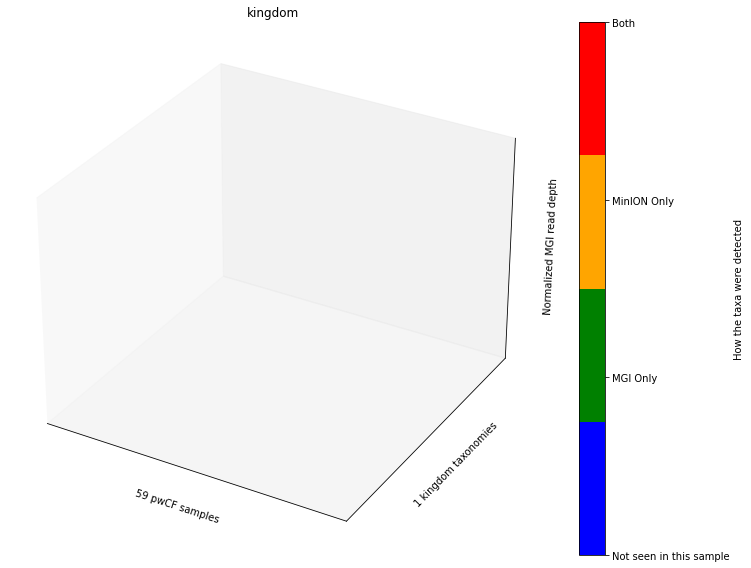

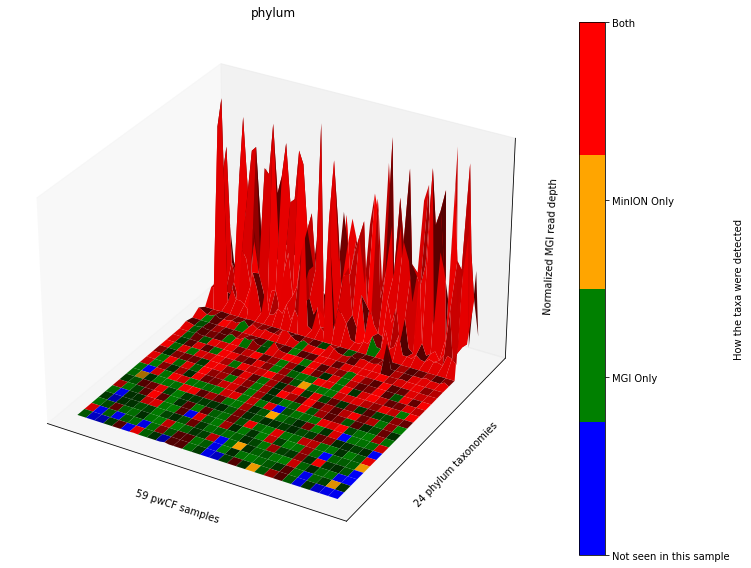

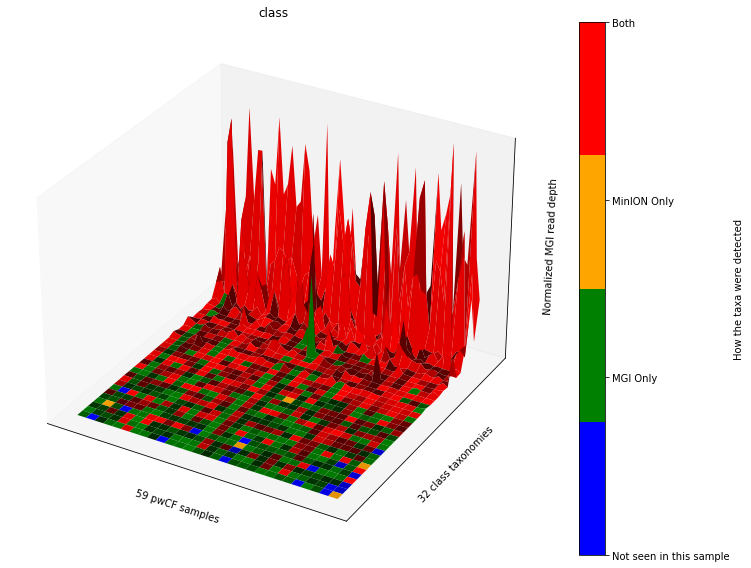

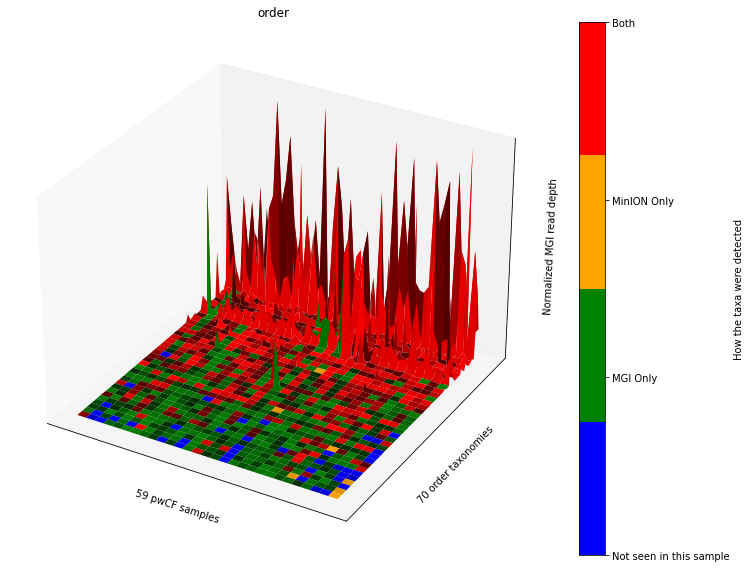

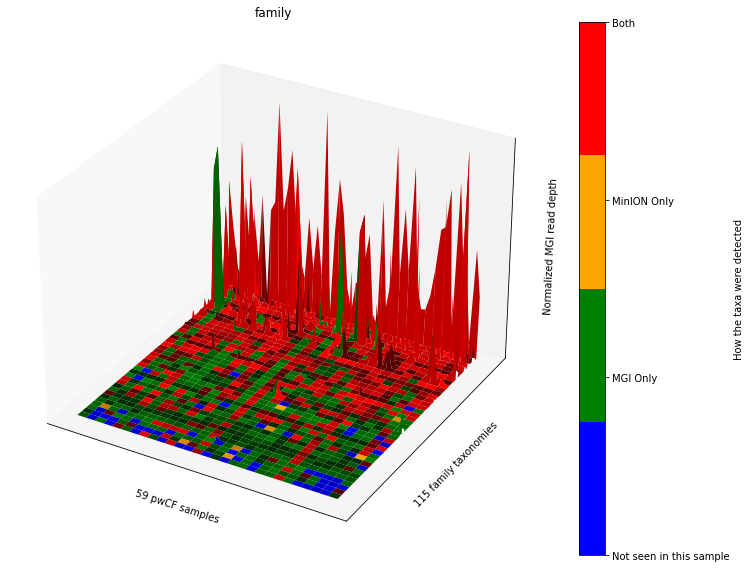

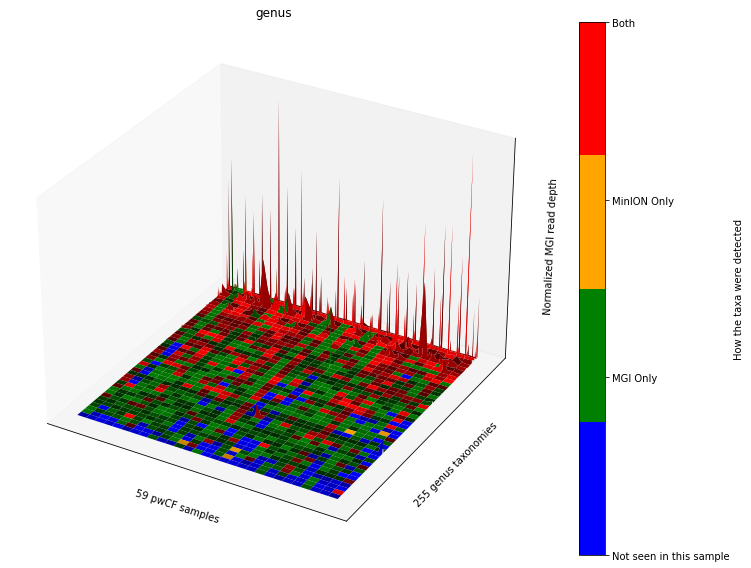

In [353]:
taxonomies = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus']

cmap = ListedColormap(['blue', 'green', 'orange', 'red'])

row = 0
col = 0
minreads = 100
for i, tax in enumerate(taxonomies):
    # read the data 
    mgi_df = read_taxonomy(f"../MGI/Taxonomy/MGI_reads_{tax}.normalised.tsv.gz", tax[0], minreads)
    min_df = read_taxonomy(f"../MinION/Taxonomy/Minion_read_based_annotations_{tax}.normalised.tsv.gz", tax[0], minreads)
    common_taxonomies = mgi_df.index.intersection(min_df.index)

    # Create subsets of the DataFrames containing only the common taxonomies
    mgi_df_l = mgi_df.loc[common_taxonomies]
    min_df_l = min_df.loc[common_taxonomies]

    sboth = sorted_presence_absence(mgi_df_l, min_df_l, 0, asc_sort=True)
    x, y, z = convert_df_xyz(mgi_df_l, sboth)


    # Define a color map based on the heatmap values
    colors = cmap(sboth.values / sboth.values.max())

    # Create a 3D plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.plot_surface(x,y,z, facecolors=colors, edgecolor='None', vmin=0, vmax=3, antialiased=True)
    

    # Set labels
    ax.title.set_text(tax)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_xlabel(f"{sboth.shape[1]} pwCF samples")
    ax.set_ylabel(f"{sboth.shape[0]} {tax} taxonomies")
    ax.set_zlabel("Normalized MGI read depth")

    if i == 2:
        row = 1
        col = 0
    else:
        col += 1
        
        

    # Show color bar
    mappable = plt.cm.ScalarMappable(cmap=cmap)
    mappable.set_array(np.linspace(0, 3, 256))  # Color bar mapping
    cbar = plt.colorbar(mappable, ax=ax)
    cbar.set_label('How the taxa were detected')
    cbar.set_ticks([0, 1, 2, 3])
    cbar.ax.set_yticklabels(["Not seen in this sample", "MGI Only", 'MinION Only', 'Both'])
    plt.tight_layout()  # Adjust layout to make room for the x-axis labels

    fig.savefig(f"img/3D-{tax}-{minreads}.svg")
    fig.savefig(f"img/3D-{tax}-{minreads}.png")
    plt.show()